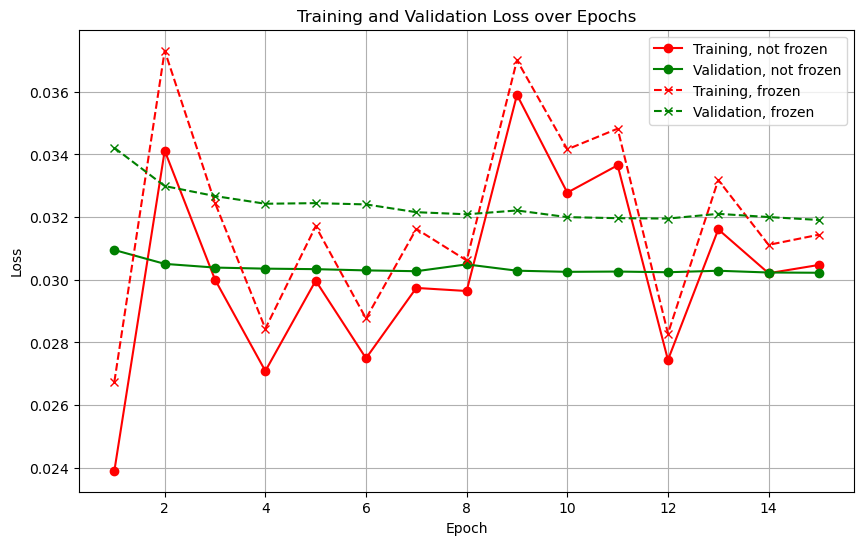

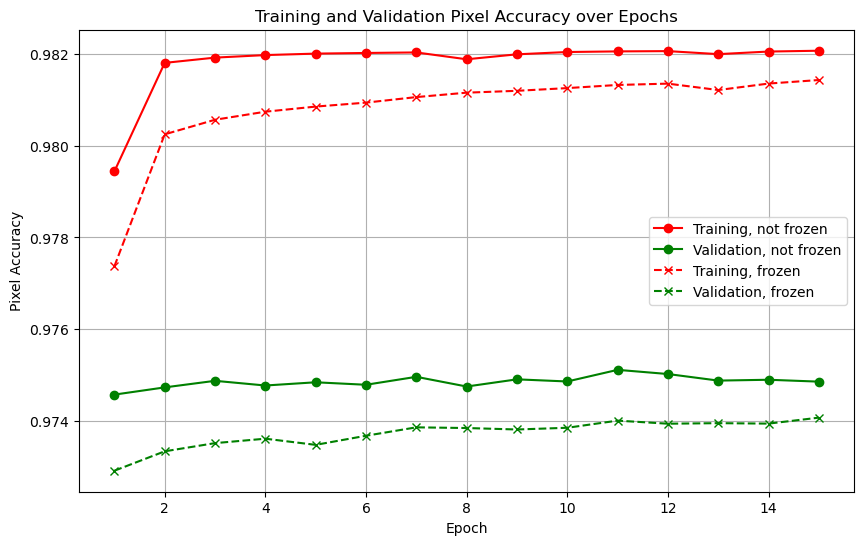

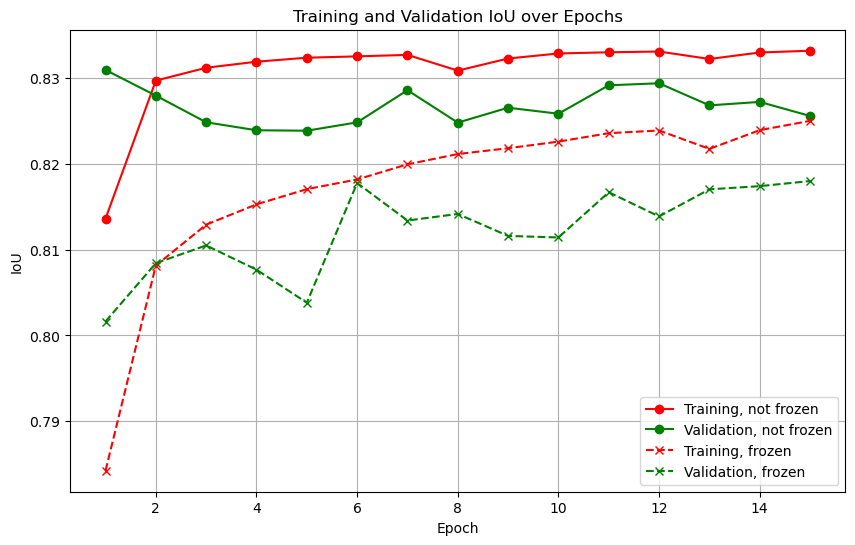

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_file = 'finetune_metrics/mobilenet_nf_100p_15e_512px.csv'
csv_file2 = 'finetune_metrics/mobilenet_f_100p_15e_512px.csv'
data = pd.read_csv(csv_file)
data2 = pd.read_csv(csv_file2)

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(data['epoch'], data['Train_loss'], 'r-o', label='Training, not frozen')
plt.plot(data['epoch'], data['Valid_loss'], 'g-o', label='Validation, not frozen')
plt.plot(data2['epoch'], data2['Train_loss'], 'r--x',label='Training, frozen')
plt.plot(data2['epoch'], data2['Valid_loss'], 'g--x',label='Validation, frozen')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Pixel Accuracy
plt.figure(figsize=(10, 6))
plt.plot(data['epoch'], data['Train_pix_acc'], 'r-o', label='Training, not frozen')
plt.plot(data['epoch'], data['Valid_pix_acc'], 'g-o', label='Validation, not frozen')
plt.plot(data2['epoch'], data2['Train_pix_acc'], 'r--x',label='Training, frozen')
plt.plot(data2['epoch'], data2['Valid_pix_acc'], 'g--x',label='Validation, frozen')
plt.xlabel('Epoch')
plt.ylabel('Pixel Accuracy')
plt.title('Training and Validation Pixel Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation IoU
plt.figure(figsize=(10, 6))
plt.plot(data['epoch'], data['Train_IoU'], 'r-o', label='Training, not frozen')
plt.plot(data['epoch'], data['Valid_IoU'], 'g-o', label='Validation, not frozen')
plt.plot(data2['epoch'], data2['Train_IoU'], 'r--x',label='Training, frozen')
plt.plot(data2['epoch'], data2['Valid_IoU'], 'g--x',label='Validation, frozen')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.title('Training and Validation IoU over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
import torch

from get_model import load_model

device = 'cpu'

model_path = None#'trained_models/resnet50_nf_100p_15e_512px.pt'

model = load_model('resnet101', finetune=True, pointrend=False)
if model_path:
    model.load_state_dict(torch.load(model_path, map_location=device, weights_only=True))
model.to(device)
model.eval()

DeepLabV3, resnet101 backbone


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

Using device: cpu
DeepLabV3, mobilenet backbone
0.6854259563482751
Prediction with mask overlay saved to preview/baseline_mobilenet.png
torch.Size([3, 512, 512])


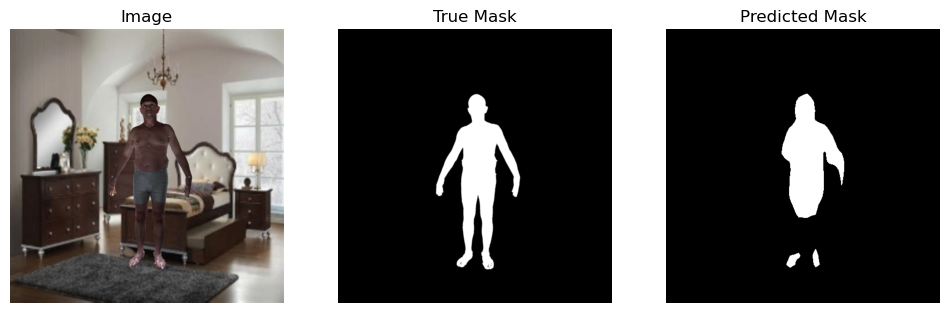

<Figure size 640x480 with 0 Axes>

In [3]:
%run previews.py --backbone mobilenet

In [1]:
import pixellib
from pixellib.torchbackend.instance import instanceSegmentation

ins = instanceSegmentation()
ins.load_model("pointrend_resnet50.pkl")
ins.segmentImage("data/segmentation_dataset/subfolder_1/images/csr0098a_front_view.png", show_bboxes=True, extract_segmented_objects=True, extract_from_box = True,
save_extracted_objects=True, output_image_name="output_image.jpg" )

AttributeError: module 'PIL.Image' has no attribute 'LINEAR'